In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df = pd.read_html("http://stat.motc.gov.tw/mocdb/stmain.jsp?sys=220&ym=8501&ymt=10802&kind=21&type=1&funid=b230101&cycle=1&outmode=0&compmode=0&outkind=1&fld0=1&rdm=9iBcnryg")
df_1 = df[1]
df_1.head()

,0,1
0,NaN,旅客人數(人次)
1,85年 3月,330714
2,85年 4月,1370561
3,85年 5月,1216399
4,85年 6月,956596


更改時間格式

In [59]:
for i in range(1,len(df_1)):
    j = 0
    tempy = ''
    tempm = ''
    while df_1[0][i][j] != '年' :
        tempy += df_1[0][i][j]
        j += 1
    j += 2
    while df_1[0][i][j] != '月' :
        tempm += df_1[0][i][j]
        j += 1
    if(len(tempm) == 1):
        tempm = '0'+ tempm
    df_1[0][i] = int(tempy) * 12 + int(tempm)
df_1.head()

,0,1
0,NaN,旅客人數(人次)
1,1023,330714
2,1024,1370561
3,1025,1216399
4,1026,956596


計算累積旅客人次

In [86]:
df_2 = pd.DataFrame({0:np.zeros(len(df_1)),1:np.zeros(len(df_1))})
df_2[1][0] = "累積旅客人數(人次)"
for i in range (1, len(df_1)):
    df_2[0][i] = df_1[0][i]
    if(i != 1):
        df_2[1][i] = int(df_2[1][i-1]) + int(df_1[1][i])
    else:
        df_2[1][i] = int(df_1[1][i])
df_2.head()

C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,0,1
0,0.0,累積旅客人數(人次)
1,1023.0,330714
2,1024.0,1701275
3,1025.0,2917674
4,1026.0,3874270


作圖，取旅次成長大致為線性的部分

<function matplotlib.pyplot.show(*args, **kw)>

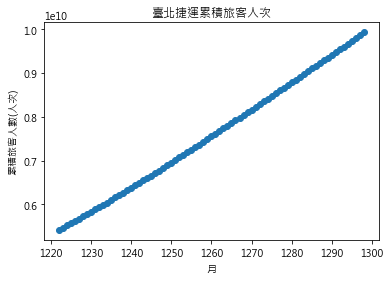

In [94]:
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
month = []
trip = []
for i in range(200, len(df_2)): 
    month.append(df_2[0][i])
    trip.append(df_2[1][i])
plt.scatter(month, trip)
plt.xlabel("月")
plt.ylabel("累積旅客人數(人次)")
plt.title("臺北捷運累積旅客人次")
plt.show

線性迴歸，預測第100億旅次出現的時間，並與實際狀況比較

In [138]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
Month = np.array(month)
Trip = np.array(trip)
Month = Month.reshape(len(Month), 1)
Trip = Trip.reshape(len(Trip), 1)
regr.fit(Trip,Month)
Month1 = regr.predict(10000000000) #預測第100億旅次出現的時間
Year = int(int(Month1)/12)
Month1 = Month1 - 12* Year
Day = Month1 - int(Month1)
Month1 = int(Month1 - Day)
Day = 30 * Day
Hour = Day - int(Day)
Day = int(Day - Hour)
Hour = int(18*Hour) + 6
print("第100億旅次預計出現在:",Year,"年",Month1,"月",Day,"日",Hour,"點")
print("第100億旅次實際出現在: 108 年 3 月 11 日 11 點")

第100億旅次預計出現在: 108 年 4 月 5 日 12 點
第100億旅次實際出現在: 108 年 3 月 11 日 11 點


預測第100~200億旅次出現的時間

In [139]:
from ipywidgets import interact
def f(x):
    Month1 = regr.predict(x * 100000000)
    Year = int(int(Month1)/12)
    Month1 = Month1 - 12* Year
    Day = Month1 - int(Month1)
    Month1 = int(Month1 - Day)
    Day = 30 * Day
    Hour = Day - int(Day)
    Day = int(Day - Hour)
    Hour = int(18*Hour) + 6
    print("第",x,"億旅次預計出現在:",Year,"年",Month1,"月",Day,"日",Hour,"點")
interact(f,x=(100,200))

interactive(children=(IntSlider(value=150, description='x', max=200, min=100), Output()), _dom_classes=('widge…

<function __main__.f(x)>